# 1 - Source Coding

In [4]:
import numpy as np
from random import seed

from random import randint
from random import choices
import matplotlib.pyplot as plt

import math
alphabet = "abcdefghijklmonpqrstuvwxyz"
finite_Set = generate_Distribution(2, [0.5, 0.5])

import PIL

png = PIL.Image.open("/Users/glenan/Downloads/scan.png")
#png.show()

png_data=np.asarray(png)
print(png_data.shape[0])

3300


The `finite_Set` variable will be the alphabet from which random vectors will be built. 

In [5]:
def generate_Distribution(set_Length, custom_Weights):
    set_Dict = {}
    for k in range(0, set_Length):
        if (custom_Weights == 0):
            set_Dict[alphabet[k]] = 1/set_Length
        elif (len(custom_Weights) == set_Length):
            set_Dict[alphabet[k]] = custom_Weights[k]
        else:
            print("erreur")
    return set_Dict

In [6]:
print(generate_Distribution(2, 0))

{'a': 0.5, 'b': 0.5}


In [7]:
def rand_Vector(vector_length, finite_set):
    lst = choices(list(finite_set.keys()), weights=finite_set.values(), k=vector_length)
    v = np.array(lst)
    return v

The function `rand_Vector` will build a vector of given length with values randomly chosen from a `finite_Set`.

In [8]:
def get_Distribution(rand_vector):
    #as we used a np.vector to create a random vector, its elements are countable with the following
    values, counts = np.unique(rand_vector, return_counts=True)
    #a new array of *observed* probabilities is thus created
    
    #distribution = counts/len(rand_vector)
    return dict(zip(values, counts/len(rand_vector)))

The function `get_Distribution` will output a list of the *observed* distribution of any given vector.  

In [9]:
randomized_distributed_Set = get_Distribution(rand_Vector(10, finite_Set))
print(randomized_distributed_Set)

{'a': 0.6, 'b': 0.4}


This method (downsampling an uniform distribution) can be used to generate randomized distributions for a given set of symbols.  
For example :  

In [10]:
uniform_Distribution = generate_Distribution(10,0)
print("Each symbol has the same associated probability : \n", uniform_Distribution) 

random_Distrib_From_Uniform_Set = get_Distribution(rand_Vector(23, uniform_Distribution))
print("New randomized distribution : \n", 
      list({map(lambda key: key, random_Distrib_From_Uniform_Set.keys()):
       map(lambda p: round(p,3), random_Distrib_From_Uniform_Set.values())}))

Each symbol has the same associated probability : 
 {'a': 0.1, 'b': 0.1, 'c': 0.1, 'd': 0.1, 'e': 0.1, 'f': 0.1, 'g': 0.1, 'h': 0.1, 'i': 0.1, 'j': 0.1}
New randomized distribution : 


## 1.1 - Entropy estimation

In [13]:
def entropy_V(vector):
    entropy = 0
    distr = get_Distribution(vector)
    for p_k in distr.values():
        if (p_k!=0):
            entropy -= p_k * math.log2(p_k)
    return entropy

def entropy_D(distr):
    entropy = 0
    for p_k in distr.values():
        if (p_k!=0):
            entropy -= p_k * math.log2(p_k)
    return entropy

These functions will return the entropy of a given vector with a certain distribution of probabilities for each values. `entropy_V` takes a vector as arguemnt while `entropy_D` takes a custom ditribution of discrete probabilities.  

## 1.2 - H close to 1 bit  

Note that for any long enough vector originating from a smaller `finite_Set`, the entropy will reach its upper bound, which is $log_2(\#(finite\_Set))$

In [14]:
print(entropy_D(get_Distribution(rand_Vector(1000,finite_Set))))
print(math.log2(len([0,1])))

0.999953833266239
1.0


## 1.3 - Entropy graph

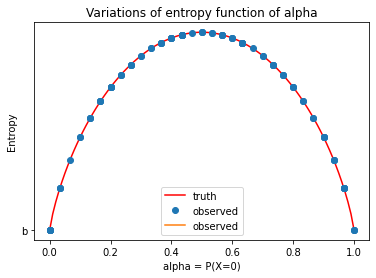

In [15]:
#alpha is the "truth"
alpha = [ i/100 for i in range(0, 101)]
ent = [ entropy_D( generate_Distribution(2,[alpha[i], 1 - alpha[i]]) ) for i in range(0, len(alpha))]


#alpha2 is an observed relization
alpha2 = []
for k in range(0,101):
    d = get_Distribution(rand_Vector(30, generate_Distribution(2, [alpha[k], 1-alpha[k]])))
    if "a" in d:
        alpha2.append(d["a"])
    else:
        alpha2.append(0)   
ent2 = [ entropy_D( generate_Distribution(2, [alpha2[i], 1 - alpha2[i]])) for i in range(0,len(alpha)) ]
    
#generating an "observed" distribution from a small vector using the original value of alpha (P(X=0)).
#alpha2 = [get_Distribution(rand_Vector(10, generate_Distribution(2, [alpha[5], 1-alpha[5]])))["a"] for i in range(1,101)]


#general plotting
plt.plot(alpha, ent, "r", label="truth")
plt.plot(alpha2, ent2,"o", "b", label="observed")
plt.xlabel('alpha = P(X=0)')
plt.ylabel('Entropy') 
plt.title('Variations of entropy function of alpha')
plt.legend()
plt.show()

Here we consider a succession of 0s and 1s : `alpha` will be the "truth" probability of getting a 0, obtained from the original distribution.  

`alpha2` will be an "observed" distribution, originating from the observation of a realization of the original ditribution. The fact that this observed vector is relativeliy small induces a certain error when compared to the "truth" ditribution.  

## 1.4 - Discrete source *with memory*

If we assume the stationarity of the Markov chain : $$(p_0, p_1) * \begin{pmatrix} p_{00} & p_{01} \\ p_{10} & p_{11}\end{pmatrix} = (p_0, p_1)$$   
Which gives the following system :  
$$\begin{cases} p_0.p_{00}+p_1.p_{01}=p_0 \\ p_0.p_{10}+p_1.p_{11}=p_1 \\ p_0+p_1=1 \end{cases}$$  

Solving this system gives :  
$$\begin{cases} p_0 = \frac{p_{01}}{1-p_{00}+p_{01}} \\ p_1 = \frac{1-p_{00}}{1-p_{00}+p_{01}} \end{cases}$$  

In the end, the entropy of a discrete source with memory is :  
$$H(x_k) = -\sum_{k=0}^{1} \sum_{j=0}^1 p_{jk}.log_2(p_jk).p_k\\ = -p_{00}.log_2(p_{00}).p_0 -p_{01}.log_2(p_{01}).p_1\\- p_{10}.log_2(p_{10}).p_0 - p_{11}.log_2(p_{11}).p_1$$

## 1.5 - Application to image processing  

In [18]:
# 1 is white
# 0 is black

#this function will count every transition to get the transition matrix
def get_Probs(image):
    
    png_data=np.asarray(image)
    flat_array = png_data.flatten()
    #dimensions of the image
    dim_X = png_data.shape[0]
    dim_Y = png_data.shape[1]
    
    #number of transitions from either black or white pixels
    transition_from_black = 0
    transition_from_white = 0
    
    #transition occurences
    o_0_0 = 0 #black to black
    o_0_1 = 0 #black to white
    o_1_0 = 0 #white to black
    o_1_1 = 0 #white to white
    
    current_Color = png_data[0][0]
    #iteration through the image : the first pixel is omitted because it has no "previous pixel"
    for pixel in flat_array[1:]:
            
            #depending on the transition, incrementing the appropriate counter
            if (current_Color == pixel):
                
                if (pixel == 1):
                    transition_from_white += 1
                    o_1_1 += 1
                    
                else:
                    transition_from_black += 1
                    o_0_0 += 1
                    
            elif (current_Color != pixel):
                
                if (pixel == 1):
                    transition_from_black += 1
                    o_0_1 += 1
                    
                else:
                    transition_from_white += 1
                    o_1_0 += 1
            current_Color = pixel
    
    #returning the transition matrix (it's actually a list)
    return [o_0_0/transition_from_black, 
            o_0_1/transition_from_black, 
            o_1_0/transition_from_white, 
            o_1_1/transition_from_white]

In [19]:
transition_Probs = get_Probs(png)
print(transition_Probs)
#warning : this is an extemely inefficient function that will take about 30s to end.

[0.7422790022614507, 0.2577209977385493, 0.013361755881493773, 0.9866382441185062]


This gives the following transition matrix : $$\begin{pmatrix} 0.7422790022614507 & 0.2577209977385493 \\ 0.013361755881493773 & 0.9866382441185062\end{pmatrix}$$   
  
The *white to white* transition probability is obviously very high $(p_{11})$, as well as the *black to black* transition probability ($p_{00}$).  
This matrix is *per se* stochastic, and thus represents a Markov process. 


Now that we have counted all the transitions in the image, we can compute the entropy of this data source : 

In [23]:
def entropy_w_Mem(transition_probs):
    
    #to make things clearer
    p_0_0 = transition_probs[0]
    p_0_1 = transition_probs[1]
    p_1_0 = transition_probs[2]
    p_1_1 = transition_probs[3]
    
    #we first need to compute the *a priori* probabilities using the formulae in 1.4 (p0 & p1)
    p_0 = p_0_1 / (1 - p_0_0 + p_0_1)
    p_1 = (1 - p_0_0) / (1 - p_0_0 + p_0_1)
    
    #entropy : 
    entropy = (p_0_0*math.log2(p_0_0)*p_0 + 
               p_0_1*math.log2(p_0_1)*p_1 + 
               p_1_0*math.log2(p_1_0)*p_0 + 
               p_1_1*math.log2(p_1_1)*p_1)
    
    return -entropy



def entropy_wo_Mem(image):
    png_data=np.asarray(image).flatten()
    return entropy_V(png_data)

In [24]:
entropy_w_mem = entropy_w_Mem(transition_Probs)
entropy_wo_mem = entropy_wo_Mem(png_data)

In [25]:
print("Avec mémoire :", entropy_w_mem)
print("sans mémoire :", entropy_wo_mem)

Avec mémoire : 0.46281114884188257
sans mémoire : 0.2833745831777161


Interpretation : given the fact that the source's (image) values originate from the set [0,1], and that this source is not memoryless, the entropy is expected to be somewhat lower than 1 ($log_2(2)$).  
Thus E = 0.4628 bit/symbol seems at least coherent when compared to the E = 0.2282 bit/symbol of a memoryless source.


In [26]:
def RLE_encoder(png_data):
    #flattening the data :
    RLE_data = []
    currentpixel = png_data[0][0]
    RLE_data.append((1,currentpixel))

    for line in png_data:
        for pixel in line:
            if pixel==currentpixel :
                #we increment the last stored tuple
                tmp_tup = RLE_data[-1]
                RLE_data[-1] = (tmp_tup[0]+1,tmp_tup[1])
            else :
                #we add the new sequence beginning to the RLE array
                RLE_data.append((1,pixel))
                currentpixel = pixel
    return RLE_data

In [27]:
def rebuild(decoded_f):
    decoded_np = np.array(decoded_f[:8415000])
    return np.split(decoded_np,3300)

def RLE_decoder(encoded):
    decoded_flat = []
    for c in encoded:
        for k in range(c[0]):
            decoded_flat.append(c[1])
    plt.imshow(rebuild(decoded_flat), cmap = "binary")
    plt.savefig("name", dpi=300)
    return 0

0

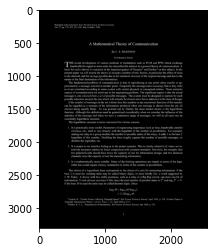

In [29]:
RLE_decoder(RLE_encoder(np.array(png)))